<a href="https://colab.research.google.com/github/bulentsoykan/IDS6938-Computational-Optimization-Models-and-Methods/blob/main/Bin_Packing_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bin Packing Problem

## Import libraries

In [32]:
import numpy as np   # for numerical operations
import matplotlib.pyplot as plt   # for visualization
from matplotlib import cm   # provides functions to work with colormaps
from matplotlib.colors import rgb2hex  # function converts RGB color values to hexadecimal color codes
import matplotlib.colors as mcolors

## Variables Initialization

In [33]:
width = 4  # width dimension of the container
height = 8  # height dimension of the container
container = np.full((height, width), 0)   # NumPy array filled with zeros

In [34]:
print(container)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


## Object Definition

In [35]:
objects = [[3, 1], [3, 3], [5, 1], [4, 2], [3, 2]]   # a list of objects to be packed into the container. Each object is represented by a list containing its width and height.

## The function attempts to fit an object into the container

In [36]:
def plot_container(container, title="Container"):
    """
    This function plots the container using matplotlib.
    Parameters:
        container: The container to be plotted.
        title: Title of the plot.
    """
    fig, ax = plt.subplots()
    cmap = mcolors.ListedColormap(['white', 'red', 'green', 'blue', 'yellow', 'purple'])
    ax.imshow(container, cmap=cmap, aspect='equal')
    ax.set_title(title)
    ax.set_xlabel('Width')
    ax.set_ylabel('Height')
    plt.show()

In [37]:
def fit(container, object, obj_index, rotate=True, rotation_attempts=0):
    """
    This function attempts to fit an object into the container.
    Parameters:
        container: The container to fit the object into.
        object: The object to be placed in the container.
        obj_index: Index representing the object in the container.
        rotate: Boolean flag indicating whether the object can be rotated.
        rotation_attempts: Number of rotation attempts made for the object.
    """
    obj_w = object[0]  # Width of the object
    obj_h = object[1]  # Height of the object
    print(f"Trying to fit object {obj_index} of size {object} into the container.")
    for i in range(height - obj_h + 1):  # Iterate over possible vertical positions in the container
        for j in range(width - obj_w + 1):  # Iterate over possible horizontal positions in the container
            placement = container[i: i + obj_h, j: j + obj_w]    # Extract the region where the object will be placed
            print(f"Checking position ({i}, {j}) for object {obj_index}.")
            if placement.sum() == 0:  # Check if the placement is valid (no overlapping objects)
                container[i: i + obj_h, j: j + obj_w] = obj_index  # Place the object in the container
                print(f"Placing object {obj_index} at position ({i}, {j}).")
                plot_container(container, f"Placing object {obj_index} at position ({i}, {j})")
                return True  # Return True indicating successful placement
    if rotate and rotation_attempts < 1:  # Limit rotation attempts to 1
        print(f"Object {obj_index} does not fit at any orientation. Trying to rotate.")
        return fit(container, object[::-1], obj_index, rotate=False, rotation_attempts=1)  # Recursively attempt to fit the object by rotating it
    print(f"Object {obj_index} could not be placed in the container.")
    return False

Trying to fit object 1 of size [3, 1] into the container.
Checking position (0, 0) for object 1.
Placing object 1 at position (0, 0).


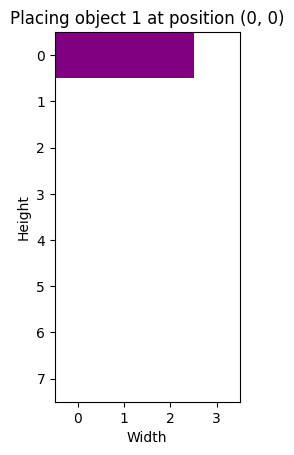

Trying to fit object 2 of size [3, 3] into the container.
Checking position (0, 0) for object 2.
Checking position (0, 1) for object 2.
Checking position (1, 0) for object 2.
Placing object 2 at position (1, 0).


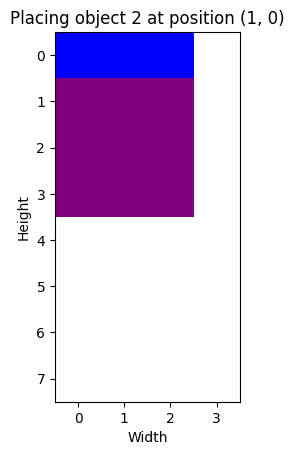

Trying to fit object 3 of size [5, 1] into the container.
Object 3 does not fit at any orientation. Trying to rotate.
Trying to fit object 3 of size [1, 5] into the container.
Checking position (0, 0) for object 3.
Checking position (0, 1) for object 3.
Checking position (0, 2) for object 3.
Checking position (0, 3) for object 3.
Placing object 3 at position (0, 3).


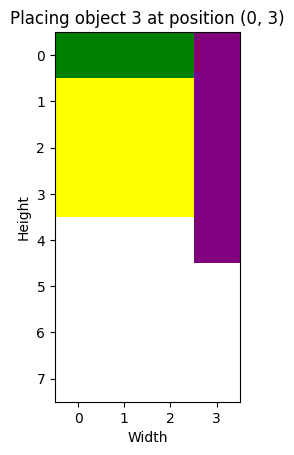

Trying to fit object 4 of size [4, 2] into the container.
Checking position (0, 0) for object 4.
Checking position (1, 0) for object 4.
Checking position (2, 0) for object 4.
Checking position (3, 0) for object 4.
Checking position (4, 0) for object 4.
Checking position (5, 0) for object 4.
Placing object 4 at position (5, 0).


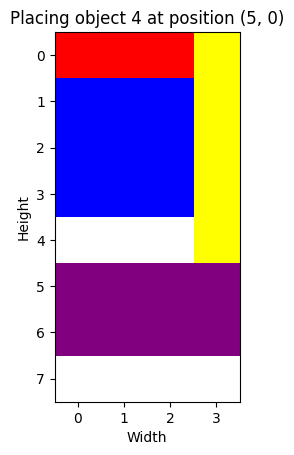

Trying to fit object 5 of size [3, 2] into the container.
Checking position (0, 0) for object 5.
Checking position (0, 1) for object 5.
Checking position (1, 0) for object 5.
Checking position (1, 1) for object 5.
Checking position (2, 0) for object 5.
Checking position (2, 1) for object 5.
Checking position (3, 0) for object 5.
Checking position (3, 1) for object 5.
Checking position (4, 0) for object 5.
Checking position (4, 1) for object 5.
Checking position (5, 0) for object 5.
Checking position (5, 1) for object 5.
Checking position (6, 0) for object 5.
Checking position (6, 1) for object 5.
Object 5 does not fit at any orientation. Trying to rotate.
Trying to fit object 5 of size [2, 3] into the container.
Checking position (0, 0) for object 5.
Checking position (0, 1) for object 5.
Checking position (0, 2) for object 5.
Checking position (1, 0) for object 5.
Checking position (1, 1) for object 5.
Checking position (1, 2) for object 5.
Checking position (2, 0) for object 5.
Check

In [38]:
for idx, obj in enumerate(objects, 1):
    fit(container, obj, idx)